# 야구선수 연봉 예측
### 4조 : 임주나, 이윤석, 이기욱
---
![Baseball](./Baseball_1.jpg )
___

## Why
---
![Baseball](./Ryu.jpg )
___

 - 류현진, KBO에서의 마지막 리그, 2012년 한화에서의 연봉은 4억 3천만원
 - 메이저리그 연봉 600만달러 한화로 61여억원 약 15배의 연봉을 받게 됨
 - 스포츠에서는 어떻게 연봉이 책정될까?


## Goal

 > **Feature** 야구선수의 데이터를 기반으로
 
 > **Target**  내년 연봉을 예측


## Preparation
 > **데이터 수집**
  - statiz 웹사이트에서 타자의 연봉(Y) 및 기록(X)를 크롤링
  
 > **분석 방법**
  - 회귀분석
   - 가중평균을 이용한 회귀분석
   - PCA를 이용한 주성분 회귀분석
---

## Task Plan

### 데이터수집 > 전처리 > 모델 선택 > 계수추정 > 평가 > 개선 > 최종 성능 평가


---
#### 1. 데이터
 - 데이터는 야구 선수 중 타자만을 대상으로 하였으며, 100타석 이상을 기준으로 데이터를 크롤링함.
 - 데이터는 **Real number**로 이루어져 있음.
 - 예) 타율 : 0.313, 타석 : 525, 연봉 2700 (단위 : 만원)
 - 데이터의 유효숫자는 최대 소수점 6자리로 하였으며, 7번째부터는 반올림으로 계산함. 

| X | Description | C/R | Class Label | Contraint |
| :---: | :--- | :---: | :---: | :---: |
| X0 | 타석, 타자가 타석에 선 수 | R | TASUK | X0>=0
| X1 | 타수, 타석 - 볼넷 - 데드볼 - 루타 - 희생타 | R |TASU | X1>=0
| X2 | 득점, 타자가 홈을 밟은 횟수 | R | TASU | X2>=0
| X3 | 안타, 아웃되지 않은 모든 진루타 | R | ANTA | X3>=0
| X4 | 2루타, 타격시 2루까지 가는 경우 | R | 2TA | X4>=0
| X5 | 3루타, 타격시 3루까지 가는 경우 | R | 3TA | X5>=0
| X6 | 홈런, 타격시 홈까지 가는 경우 | R | HOMERUN | X6>=0
| X7 | 루타, 단타 + 2루타\*2 + 3루타\*3 + 홈런\*4 | R | ALLTA | X7>=0
| X8 | 타점, 타자가 플레이해 주자가 득점 | R | TAJUM | X8 >=0
| X9 | 도루, 주자가 다음 베이스로 가는 경우 | R | DORU | X9 >=0
| X10 | 도루실패 | R | DOSIL | X10 >=0
| X11 | 희생타, 희생번트 + 희생플라이 | R | HEUITA | X11 >= 0
| X12 | 볼넷 | R | BALLNET | X12 >= 0
| X13 | 사사구, 몸에 맞은 공 | R | SAGU | X13 >= 0
| X14 | 고의사구, 상대 투수가 고의적으로 볼넷 | R | GOSA | X14 >= 0
| X15 | 삼진, 스트라이크 3번으로 아웃 | R | SAMJIN | X15 >= 0
| X16 | 병살, 한번의 타격으로 2아웃 되는 경우 | R | BYUNGSAL | X16>=0
| X17 | 타율, 한 게임 동안 친 안타의 평균 | R | TAYUL | X17>=0
| X18 | 출루율, 타자가 베이스로 나가는 평균율 | R | CHULRU | X18>=0
| X19 | 장타율, 타격시 멀리 가는 평균율 | R | JANGTA | X19>=0
| X20 | 경력, 프로야구 경력 | R | CAREER | X20>=0
| **Y** | **연봉** | R | **SALARY** | Y>=0


In [1]:
#X 및 Y list
k = 'TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,HEUIBI,TAYUL,CHULRU,JANGTA,OPS,WOBA,WRC,WAR,WPA,CAREER,SALARY'
a = list(k.split(','))

#2015년 타자 데이터
df1 = pd.read_csv('salary_prediction_taja_add_career.csv')

df1.head()
dfX = pd.DataFrame(df1, columns = a[:-7])
dfX['HEUITA'] += dfX['HEUIBI']
del dfX['HEUIBI']
df_C = pd.DataFrame(df1, columns = ['CAREER'])
dfY = pd.DataFrame(df1, columns = ['SALARY'])
dfX

,TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,TAYUL,CHULRU,JANGTA
0,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,7,0.381,0.498,0.790
1,566,497,76,138,41,4,11,220,56,25,10,59,4,1,121,2,6,0.278,0.357,0.443
2,598,520,103,188,42,1,23,301,116,3,3,67,2,2,71,13,9,0.362,0.431,0.579
3,559,448,90,144,25,0,26,247,116,3,0,83,19,0,97,13,9,0.321,0.441,0.551
4,582,511,89,148,35,5,19,250,73,22,4,56,5,2,115,10,10,0.290,0.362,0.489
5,513,442,70,144,27,0,20,231,93,5,4,39,24,3,64,7,8,0.326,0.405,0.523
6,622,564,112,184,34,5,28,312,135,23,4,32,15,1,127,9,11,0.326,0.373,0.553
7,537,440,75,125,30,1,22,223,73,6,4,74,13,1,115,8,10,0.284,0.399,0.507
8,617,520,111,158,31,6,3,210,47,46,16,73,14,0,108,4,10,0.304,0.399,0.404
9,465,410,97,143,33,5,11,219,57,17,7,45,6,0,79,3,4,0.349,0.417,0.534


### 데이터 전처리
 - 정규화(normalize) 사용

In [2]:
from sklearn.preprocessing import normalize
k1 = 'TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,TAYUL,CHULRU,JANGTA'
b = list(k1.split(','))
result = []
for i in b:
    result.append(normalize(dfX[i]).T)

#한 선수당 1 column인 data table    
db_batter_index = pd.DataFrame(np.hstack(result), columns = b)
db_batter_columns = db_batter_index.T
db_batter_index

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/vali

,TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,TAYUL,CHULRU,JANGTA
0,0.144593,0.132288,0.216451,0.166232,0.204269,0.209795,0.325714,0.218952,0.233605,0.278356,0.164226,0.239674,0.177220,0.389885,0.125696,0.076372,0.076886,0.140532,0.144986,0.184098
1,0.137546,0.139295,0.126541,0.127445,0.199405,0.167836,0.076231,0.129141,0.093442,0.173972,0.205282,0.137289,0.054529,0.035444,0.167134,0.021820,0.065902,0.102540,0.103936,0.103235
2,0.145322,0.145742,0.171496,0.173620,0.204269,0.041959,0.159392,0.176688,0.193558,0.020877,0.061585,0.155904,0.027265,0.070888,0.098071,0.141833,0.098853,0.133524,0.125480,0.134927
3,0.135845,0.125562,0.149851,0.132986,0.121589,0.000000,0.180182,0.144990,0.193558,0.020877,0.000000,0.193135,0.259013,0.000000,0.133984,0.141833,0.098853,0.118401,0.128391,0.128403
4,0.141434,0.143219,0.148186,0.136680,0.170224,0.209795,0.131672,0.146751,0.121808,0.153096,0.082113,0.130308,0.068161,0.070888,0.158847,0.109102,0.109837,0.106966,0.105391,0.113954
5,0.124666,0.123880,0.116550,0.132986,0.131316,0.000000,0.138602,0.135598,0.155181,0.034794,0.082113,0.090750,0.327175,0.106332,0.088402,0.076372,0.087870,0.120245,0.117910,0.121878
6,0.151155,0.158073,0.186481,0.169926,0.165361,0.209795,0.194042,0.183145,0.225262,0.160054,0.082113,0.074462,0.204484,0.035444,0.175422,0.098192,0.120821,0.120245,0.108594,0.128869
7,0.130498,0.123320,0.124876,0.115439,0.145906,0.041959,0.152462,0.130902,0.121808,0.041753,0.082113,0.172193,0.177220,0.035444,0.158847,0.087282,0.109837,0.104753,0.116163,0.118149
8,0.149940,0.145742,0.184816,0.145915,0.150770,0.251754,0.020790,0.123271,0.078425,0.320109,0.328451,0.169866,0.190852,0.000000,0.149178,0.043641,0.109837,0.112130,0.116163,0.094146
9,0.113001,0.114912,0.161506,0.132062,0.160497,0.209795,0.076231,0.128554,0.095111,0.118301,0.143697,0.104712,0.081794,0.000000,0.109121,0.032731,0.043935,0.128729,0.121404,0.124441


In [3]:
# 상관계수
corr_data = pd.DataFrame.corr(db_batter_index)
corr_data

,TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,TAYUL,CHULRU,JANGTA
TASUK,1.000000,0.994119,0.885191,0.967224,0.835030,0.458631,0.480524,0.908842,0.749047,0.446213,0.524139,0.748908,0.364117,0.390433,0.667262,0.602686,0.465027,0.501351,0.411021,0.281078
TASU,0.994119,1.000000,0.877536,0.970647,0.836924,0.461281,0.453554,0.900706,0.731281,0.449758,0.539666,0.680318,0.335967,0.351069,0.660568,0.595233,0.462446,0.499988,0.352268,0.253717
DEUKJUM,0.885191,0.877536,1.000000,0.913815,0.854583,0.599118,0.483254,0.887466,0.683259,0.600686,0.622123,0.697994,0.334309,0.365996,0.590731,0.399756,0.320801,0.605706,0.532118,0.423060
ANTA,0.967224,0.970647,0.913815,1.000000,0.861973,0.447916,0.495649,0.937619,0.769909,0.438309,0.518970,0.691171,0.312810,0.417304,0.580029,0.573772,0.401995,0.675693,0.511450,0.385033
2TA,0.835030,0.836924,0.854583,0.861973,1.000000,0.390232,0.536768,0.884852,0.733055,0.391536,0.494273,0.619931,0.272567,0.400995,0.549139,0.439291,0.281045,0.573360,0.457486,0.478281
3TA,0.458631,0.461281,0.599118,0.447916,0.390232,1.000000,-0.101983,0.335482,0.083113,0.769077,0.648606,0.262303,0.082489,0.005642,0.231170,-0.075061,0.470052,0.205895,0.099780,-0.041184
HOMERUN,0.480524,0.453554,0.483254,0.495649,0.536768,-0.101983,1.000000,0.758298,0.868044,-0.136871,-0.073750,0.577030,0.352343,0.581468,0.548628,0.473624,-0.206528,0.372200,0.489662,0.842332
ALLTA,0.908842,0.900706,0.887466,0.937619,0.884852,0.335482,0.758298,1.000000,0.908238,0.303882,0.384630,0.740842,0.368176,0.534289,0.651357,0.587600,0.224275,0.641901,0.567685,0.624788
TAJUM,0.749047,0.731281,0.683259,0.769909,0.733055,0.083113,0.868044,0.908238,1.000000,0.031286,0.090329,0.683572,0.374242,0.604233,0.590858,0.637410,0.098447,0.533856,0.532896,0.692049
DORU,0.446213,0.449758,0.600686,0.438309,0.391536,0.769077,-0.136871,0.303882,0.031286,1.000000,0.784017,0.269200,0.085196,0.024742,0.314847,-0.134193,0.375117,0.202527,0.114651,-0.086178


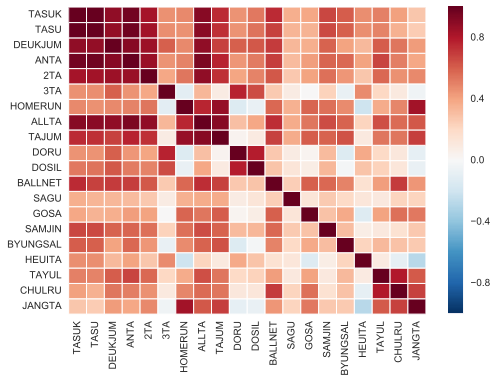

In [4]:
import seaborn as sns
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

## 가중평균을 이용한 회귀분석

### 상관계수 그룹화

In [5]:
group1 = (db_batter_index['TASUK'] + db_batter_index['TASU'] + db_batter_index['DEUKJUM'] + db_batter_index['ANTA'] \
           + db_batter_index['2TA'] + db_batter_index['HOMERUN'] + db_batter_index['ALLTA'] + db_batter_index['TAJUM'] \
           + db_batter_index['BALLNET'] + db_batter_index['SAMJIN'] + db_batter_index['BYUNGSAL'] + db_batter_index['HEUITA'] \
           + db_batter_index['TAYUL'] + db_batter_index['CHULRU'] + db_batter_index['JANGTA'])/15
group2 = (db_batter_index['3TA'] + db_batter_index['SAGU'])/2
group3 = (db_batter_index['DORU'] + db_batter_index['GOSA'])/2
group4 = db_batter_index['DOSIL']

In [6]:
#가중평균점수
score = pd.concat([group1, group2, group3, group4], axis = 1)
score.columns = ['Attack', 'Strength', 'Mobility', 'Missing']

dfY = pd.DataFrame(df1, columns = ['SALARY'])

In [7]:
df_career = pd.DataFrame(np.log(df_C['CAREER']+1).T, columns = ['CAREER'])
salary_prediction_w = pd.concat([score, df_career, np.log(dfY)], axis = 1)
salary_prediction_w

,Attack,Strength,Mobility,Missing,CAREER,SALARY
0,0.175357,0.193507,0.334120,0.164226,0.693147,11.736069
1,0.115393,0.111183,0.104708,0.205282,1.945910,10.126631
2,0.150579,0.034612,0.045882,0.061585,2.397895,11.002100
3,0.141837,0.129507,0.010438,0.000000,2.484907,11.225243
4,0.131625,0.138978,0.111992,0.082113,0.693147,9.680344
5,0.117480,0.163587,0.070563,0.082113,2.197225,10.645425
6,0.150670,0.207140,0.097749,0.082113,1.098612,10.308953
7,0.127496,0.109589,0.038599,0.082113,2.564949,10.043249
8,0.119642,0.221303,0.160054,0.328451,1.098612,9.852194
9,0.109796,0.145795,0.059151,0.143697,0.000000,8.987197


In [8]:
regression_w = 'SALARY ~ np.log(Attack) + Mobility + Missing + CAREER'
model_salary_w = sm.OLS.from_formula(regression_w, data = salary_prediction_w)
result_salary_w = model_salary_w.fit()
print (result_salary_w.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     37.29
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           1.41e-17
Time:                        03:32:03   Log-Likelihood:                -72.288
No. Observations:                  85   AIC:                             154.6
Df Residuals:                      80   BIC:                             166.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.1855      0.706     18.

- Cross Validation에서는 평균 r2 score가 0.5를 기록해 다른 모델을 선택

## PCA를 이용한 주성분 회귀분석
 - 누적설명력이 80% 넘는 지점을 기준으로 설정
 - 너무 많은 PCA 축을 요하지 않게 누적설명력 80%로 설정

In [9]:
#PCA setting
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(db_batter_index)
#How many PCA do I need to use?
# Over 80% of accumulated explaining ability
k = pca.explained_variance_ratio_
sum = k[0] + k[1] + k[2] + k[3]
print (k)
print ('='*20)
print( 'Average :' + str(sum))

[ 0.41000883  0.26295137  0.08885089  0.06256719  0.04804775]
Average :0.824378275316


In [10]:
#PCA setting
from sklearn.decomposition import PCA

X_pca = PCA(n_components=3)
X_pca.fit_transform(db_batter_index)


# PCA 성분 개수

dfX_pca = pd.DataFrame(X_pca.fit_transform(db_batter_index))
dfX_pca.columns = ['PC1', 'PC2', 'PC3']
#dfX_pca


df_pca_analysis = pd.concat([dfX_pca, pd.DataFrame(normalize(df_C['CAREER']).T), np.log(dfY)], axis = 1)
df_pca_analysis.columns = ['PC1', 'PC2', 'PC3', 'CAREER', 'SALARY']

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [11]:
k3 = 'TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,TAYUL,CHULRU,JANGTA'
f = list(k3.split(','))
#고유백터
eigenvector = pd.DataFrame(X_pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = f)
eigenvector

,PC1,PC2,PC3
TASUK,-0.210020,0.025255,0.135699
TASU,-0.206192,0.016626,0.142230
DEUKJUM,-0.265857,-0.013462,0.060414
ANTA,-0.236750,0.035046,0.119713
2TA,-0.247253,0.048706,0.087743
3TA,-0.322736,-0.407204,-0.079241
HOMERUN,-0.216797,0.383068,0.048610
ALLTA,-0.244445,0.114102,0.096817
TAJUM,-0.230630,0.238065,0.123856
DORU,-0.344392,-0.452126,-0.234026


In [12]:
regression = 'SALARY ~ PC1 + PC2 + I(PC3 ** 2) + CAREER'
model_salary = sm.OLS.from_formula(regression, data = df_pca_analysis)
result_salary = model_salary.fit()
print (result_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     42.64
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           4.15e-19
Time:                        03:32:04   Log-Likelihood:                -68.492
No. Observations:                  85   AIC:                             147.0
Df Residuals:                      80   BIC:                             159.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.4212      0.137     68.812      

In [13]:
from mpl_toolkits.mplot3d import Axes3D
df_pca_X = pd.DataFrame(df_pca_analysis, columns = ['PC1', 'PC2', 'PC3'])

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(df_pca_X.ix[:,0], df_pca_X.ix[:,1], df_pca_X.ix[:,2], s=50, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')   


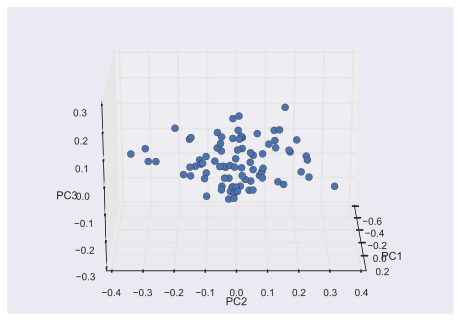

In [14]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

# 레버리지 및 아웃라이어

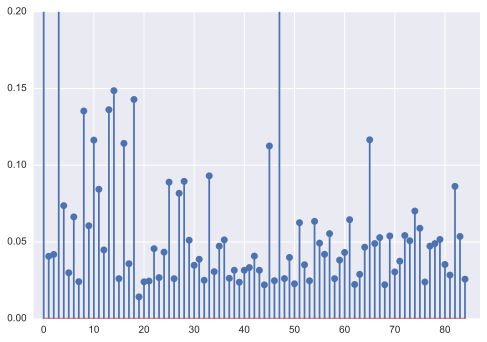

hat.sum() = 5.0


In [15]:
influence = result_salary.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(dfY)+2, 0, 0.2 ])
plt.show()
print("hat.sum() =", hat.sum())

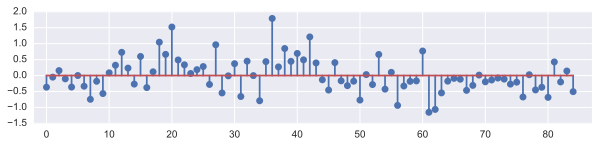

In [16]:
plt.figure(figsize=(10, 2))
plt.stem(result_salary.resid)
plt.xlim([-2, len(dfY)+2])
plt.show()

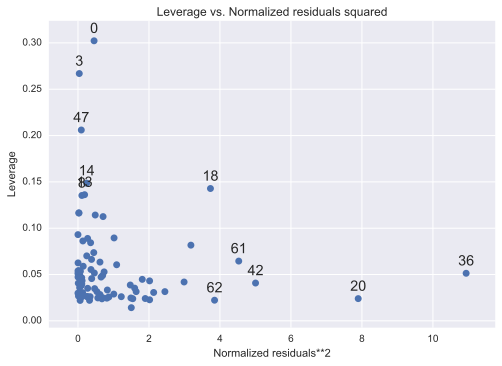

In [17]:
sm.graphics.plot_leverage_resid2(result_salary)
plt.show()

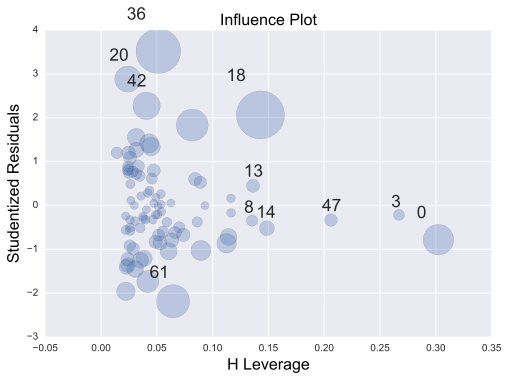

In [18]:
sm.graphics.influence_plot(result_salary, plot_alpha=0.3)
plt.show()

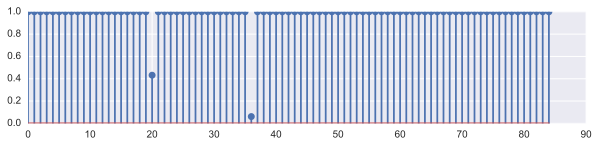

In [19]:
plt.figure(figsize=(10, 2))
plt.stem(result_salary.outlier_test().ix[:, -1])
plt.show()

## 아웃라이어 제거

In [20]:
df_pca_analysis2 = df_pca_analysis.drop(36)
df_pca_analysis3 = df_pca_analysis2.drop(20)

In [21]:
#아웃라이어 제거 후 OLS
regression = 'SALARY ~ PC1 + PC2 + I(PC3 ** 2) + CAREER'
model_salary = sm.OLS.from_formula(regression, data = df_pca_analysis3)
result_salary = model_salary.fit()
print (result_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     57.36
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           1.76e-22
Time:                        03:32:07   Log-Likelihood:                -56.811
No. Observations:                  83   AIC:                             123.6
Df Residuals:                      78   BIC:                             135.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3014      0.124     74.814      

In [22]:
df_pca_analysis4 = df_pca_analysis3
df_pca_analysis4['PC3'] = (df_pca_analysis3['PC3'] ** 2)

## Cross Validation
 - Label K Fold 사용
 - Cross Validation 하기 전에 outlier를 제거한 index를 Median으로 채움

In [23]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
pca_analysis4 = imp.fit_transform(df_pca_analysis3)

df_pca_analysis5 = pd.DataFrame(pca_analysis4, columns = ['PC1', 'PC2', 'PC3', 'CAREER', 'SALARY'])

In [24]:
df_pca_analysis_cv_x = pd.DataFrame(df_pca_analysis5, columns = ['PC1', 'PC2', 'PC3', 'CAREER'])
df_pca_analysis_cv_y = pd.DataFrame(df_pca_analysis5, columns = ['SALARY'])
X = df_pca_analysis_cv_x.ix[:]

In [25]:
from sklearn.cross_validation import LabelKFold
cv = LabelKFold(df_pca_analysis_cv_y['SALARY'], n_folds=3)
for train_index, test_index in cv:
    print("test  y:\n", df_pca_analysis_cv_y['SALARY'][test_index])
    print("." * 80 )        
    print("train y:\n", df_pca_analysis_cv_y['SALARY'][train_index])
    print("=" * 80 )

test  y:
 1     10.126631
5     10.645425
6     10.308953
8      9.852194
9      8.987197
10    11.982929
17    10.819778
23    10.819778
25     9.952278
26    11.407565
28    11.082143
29    10.341742
31    10.308953
39     9.952278
41    10.819778
44    10.819778
46     9.392662
53    10.819778
58    10.819778
60     8.779557
63    10.308953
65     9.392662
68     8.999619
69     8.987197
73     8.517193
77     9.392662
78     8.517193
79    10.126631
Name: SALARY, dtype: float64
................................................................................
train y:
 0     11.736069
2     11.002100
3     11.225243
4      9.680344
7     10.043249
11    11.156251
12    11.512925
13    11.264464
14     9.615805
15    11.156251
16    11.156251
18    11.225243
19    11.002100
20     9.903488
21    10.621327
22    10.463103
24    11.512925
27    10.596635
30     9.903488
32     9.769956
33     9.825526
34    10.714418
35    10.596635
36    10.915088
37    10.165852
38    11.289782
40    

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()

scores = np.zeros(3)

for i, (train_index, test_index) in enumerate(cv):
    X_train = df_pca_analysis_cv_x.ix[train_index]
    y_train = df_pca_analysis_cv_y['SALARY'][train_index]
    X_test = df_pca_analysis_cv_x.ix[test_index]
    y_test = df_pca_analysis_cv_y['SALARY'][test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #scores[i] = mean_squared_error(y_test, y_pred)
    scores[i] = r2_score(y_test, y_pred)

#np.mean(scores)
np.mean(scores)

0.70942565168737881

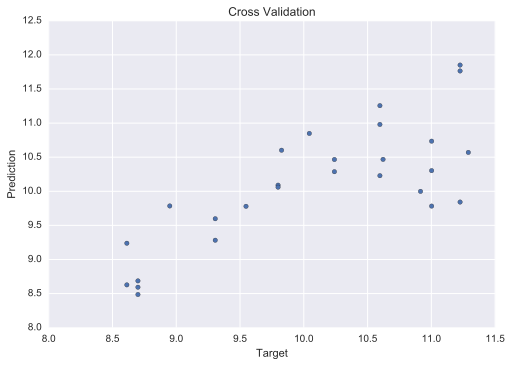

In [27]:
plt.scatter(y_test, y_pred)
plt.title('Cross Validation')
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.show()

# Final Test
 - 위의 모형을 채택, Final test data을 위 모형에 맞추어 최종평가 진행

In [28]:
k4 = 'TASUK,TASU,DEUKJUM,ANTA,2TA,3TA,HOMERUN,ALLTA,TAJUM,DORU,DOSIL,BALLNET,SAGU,GOSA,SAMJIN,BYUNGSAL,HEUITA,HEUIBI,TAYUL,CHULRU,JANGTA'
d = list(k4.split(','))

#Normalize 하기 위한 수식
# X 변수 값 / sqrt(norm)
df_norm = pd.read_csv('sqrt_norm-2.csv')
df_norm_career = pd.DataFrame(df_norm['N_CAREER'], columns = ['N_CAREER'])

del df_norm['N_CAREER']

df_norm.columns = f

df_norm

df2 = pd.read_csv('salary_prediction_taja_add_career_final_test.csv')
dfX2 = pd.DataFrame(df2, columns = d)
dfY2 = pd.DataFrame(df2, columns = ['SALARY'])

dfX2['HEUITA'] += dfX2['HEUIBI']
del dfX2['HEUIBI']

for i in f:
    dfX2[i] = dfX2[i] / df_norm[i]

dfX3 = dfX2.dot(eigenvector)

dfX_CAREER = pd.DataFrame(df2, columns = ['CAREER'])

dfX_CAREER = dfX_CAREER['CAREER'] / df_norm_career['N_CAREER']
dfX_CAREER2 = pd.DataFrame(dfX_CAREER, columns = ['CAREER'])

df_final_data_set = pd.concat([dfX3, dfX_CAREER2], axis = 1)
df_final_data_set

,PC1,PC2,PC3,CAREER
0,-0.130785,0.011045,0.134993,1.815870
1,-0.167993,0.048356,0.079256,0.907935
2,-0.193986,0.021066,0.060286,0.778230
3,-0.280582,0.112966,0.002974,2.075279
4,-0.175525,0.085143,0.141824,0.648525
5,-0.255390,-0.087930,0.134818,1.815870
6,-0.292457,0.077042,0.244899,0.907935
7,-0.202769,0.078279,0.156507,2.204984
8,-0.347380,0.118223,0.187195,1.426755
9,-0.100688,0.016192,0.063858,1.426755


In [29]:
result = np.ones(20)

for i in range(20):
    result[i] = (9.3014 + (-3.6845) * df_final_data_set['PC1'][i] + (1.6428) * df_final_data_set['PC2'][i] + (19.3214) * (df_final_data_set['PC3'][i] ** 2) + 6.5626 * df_final_data_set['CAREER'][i])

result2 = np.ones(20)

for i in range(20):
    result2[i] = np.exp(result[i])
   
result3 = result2.reshape(-1,1)

df_results_temp = pd.DataFrame(result3, columns = ['y_pred'])

df_results = pd.concat([df_results_temp, dfY2], axis = 1)

df_results

,y_pred,SALARY
0,3.846167e+09,7000
1,9.622272e+06,12500
2,4.106911e+06,8000
3,3.047536e+10,2700
4,2.502081e+06,7000
5,5.168983e+09,30000
6,4.502580e+07,21000
7,8.124981e+10,40000
8,1.096965e+09,125000
9,2.055079e+08,8500


## 한계점

1. 전체선수 약 230명 중 타석 100타석 이상인 선수들 105명으로 Data Set이 부족한 영향이 있을 것이라고 판단.
2. 선수의 경기력이 순수하게 연봉으로 연결되지 않는다는 점.(타자 기록 외에는 연봉에 영향을 미치지 않는 다는 가정이 빈약함)
3. 야구선수 중 경력 7년 이후 FA 시장에 나와 재계약 후 연봉이 급등하는 경우가 많아 이점이 고려되지 않았음
4. 위의 변수 이외에 나이, 포지션 등 영향을 끼치는 변수가 더 있을 것으로 생각됨.